# Polynominální regrese

## Úkol

- Načtěte dataset s velikostmi a cenami
- Prozkoumejte a zobrazte data
- Vytvořte lineární model a zjistětě jaho R2
- Vytvořte polynomiální modely s různým stupni, zjistěte jejich R2
- Vyberte nejlepší model 

# Načtení dat

In [2]:
import pandas as pd 

In [54]:
data = pd.read_csv ("..\dataset\prices.csv",  sep=';')

In [8]:
data.head()

,Size,Price
0,51.00000,901.18810
1,70.36735,972.23867
2,89.73469,1001.99394
3,109.10204,1024.90830
4,128.46939,1053.72491


# Lineární model
- standardizujte data
- vytvořte a natrénujte lineární model
- zobrazte parametry modelu
- vizualizujte lineární model
- zobrazte skóre modelu

In [4]:
# Z-standardization
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [5]:
# Vytvoření nového datasetu se standardizovanými proměnnými
data_std = pd.DataFrame(columns=data.columns)
for i in data.columns:
    data_std[i] = rescale(data[i])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [20]:
# Rozdělení dat na tréninková a testovací
X = np.array(data.drop('Price',axis=1))
Y = np.array(data['Price'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [23]:
# Posouzení modelu pro trénovací data
Y_pred = lr.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.6386444091304724
RMSE: 85.26036509593014


In [24]:
# Posouzení modelu pro trénovací data
Y_pred = lr.predict(X_train)
r2 = r2_score(Y_train, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))

print(f"R2 score: {r2}")
print(f"RMSE: {rmse}")

R2 score: 0.41479922663829705
RMSE: 113.53107780631204


In [26]:
# Zobrazení parametrů modelu
print("Parametry modelu:")
print(f"Váhy: {lr.coef_}")
print(f"Bias: {lr.intercept_}")

Parametry modelu:
Váhy: [0.26324348]
Bias: 1153.0029926972095


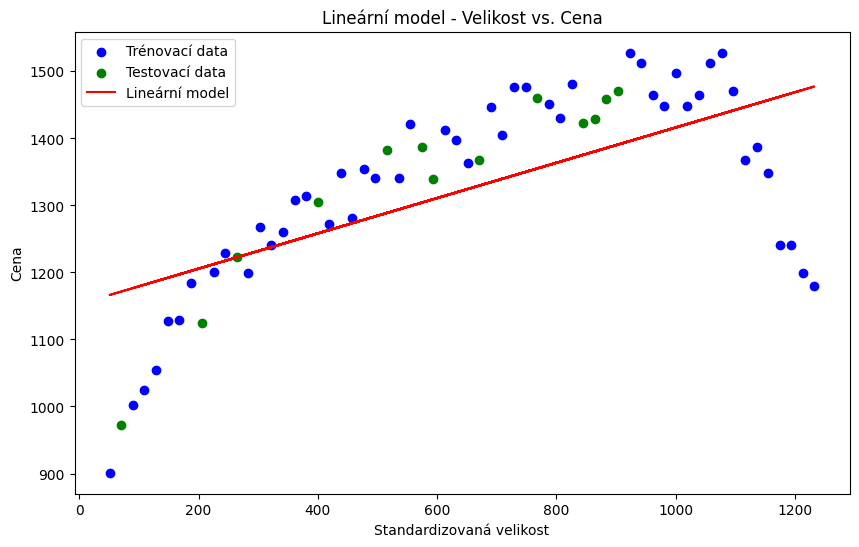

In [28]:
# Vizualizace lineárního modelu
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='blue', label='Trénovací data')
plt.scatter(X_test, Y_test, color='green', label='Testovací data')
plt.plot(X_train, lr.predict(X_train), color='red', label='Lineární model')
plt.xlabel('Standardizovaná velikost')
plt.ylabel('Cena')
plt.title('Lineární model - Velikost vs. Cena')
plt.legend()
plt.show()


In [29]:
# Zobrazení skóre modelu
train_score = lr.score(X_train, Y_train)
test_score = lr.score(X_test, Y_test)
print(f"\nSkóre modelu (R^2):")
print(f"Trénovací data: {train_score:.4f}")
print(f"Testovací data: {test_score:.4f}")


Skóre modelu (R^2):
Trénovací data: 0.4148
Testovací data: 0.6386


# Vytvořte polynominální regresní model
- vytvořte model polynominální 1D model se stupni 2 - 8
- modely zobrazte
- zobrazte jejich parametry
- zobrazte jejich skóre
- Který model byste vybrali?

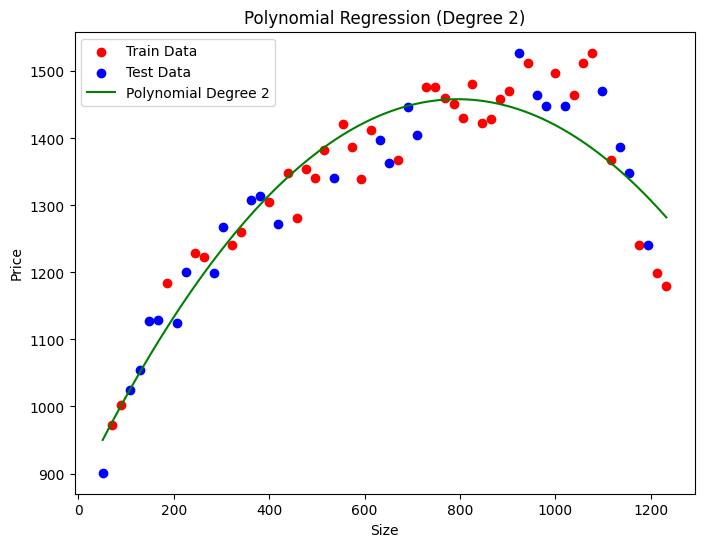

Polynomial Degree 2:
Coefficients: [ 0.00000000e+00  1.46131820e+00 -9.19639182e-04]
Intercept: 877.939915958892
R^2 Score (Train): 0.8333
R^2 Score (Test): 0.9166



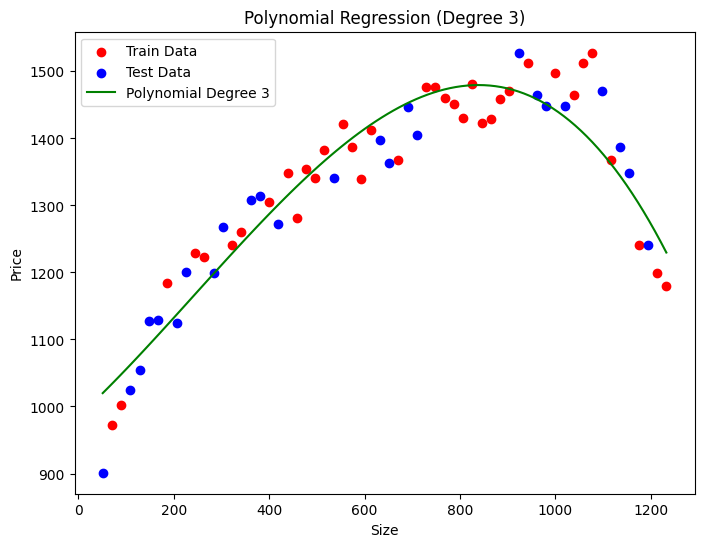

Polynomial Degree 3:
Coefficients: [ 0.00000000e+00  6.58543202e-01  5.37984169e-04 -7.39411924e-07]
Intercept: 985.047437605687
R^2 Score (Train): 0.8675
R^2 Score (Test): 0.9102



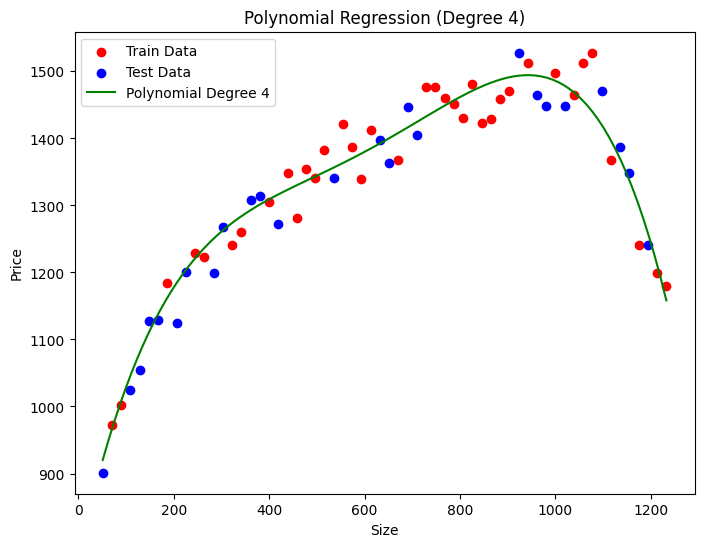

Polynomial Degree 4:
Coefficients: [ 0.00000000e+00  3.22425170e+00 -7.64680668e-03  8.77840786e-06
 -3.64443409e-09]
Intercept: 774.4652832545512
R^2 Score (Train): 0.9354
R^2 Score (Test): 0.9651



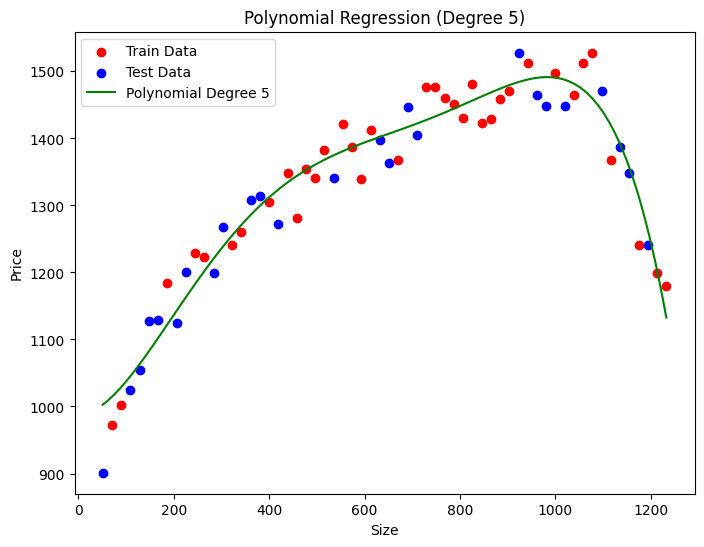

Polynomial Degree 5:
Coefficients: [ 0.00000000e+00  2.76901508e-05  6.49607417e-03 -1.71195358e-05
  1.73624078e-08 -6.23621121e-12]
Intercept: 987.8952052693362
R^2 Score (Train): 0.9282
R^2 Score (Test): 0.9486



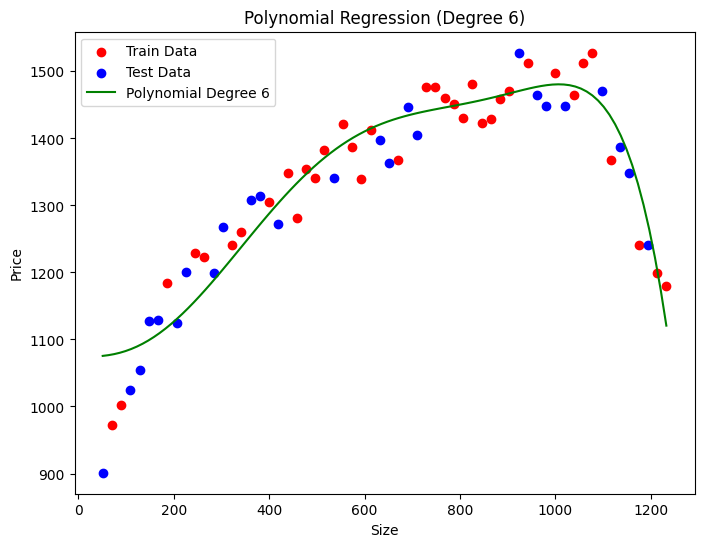

Polynomial Degree 6:
Coefficients: [ 0.00000000e+00  9.81150490e-11  5.32259175e-08  1.16643305e-05
 -3.10781988e-08  2.95714974e-11 -9.75124929e-15]
Intercept: 1074.1356859290936
R^2 Score (Train): 0.8891
R^2 Score (Test): 0.8948



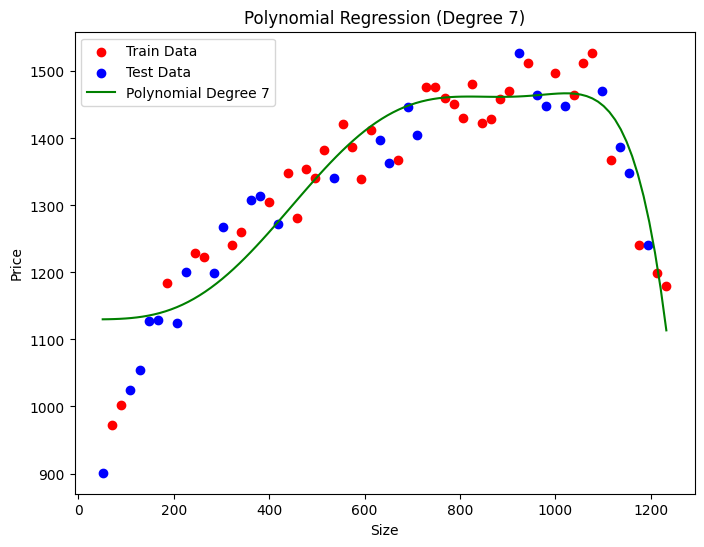

Polynomial Degree 7:
Coefficients: [ 0.00000000e+00 -3.93441124e-13  2.24506905e-13  8.20782964e-11
  1.83588229e-08 -4.89407603e-11  4.51146360e-14 -1.41960660e-17]
Intercept: 1129.9617280863768
R^2 Score (Train): 0.8357
R^2 Score (Test): 0.8239



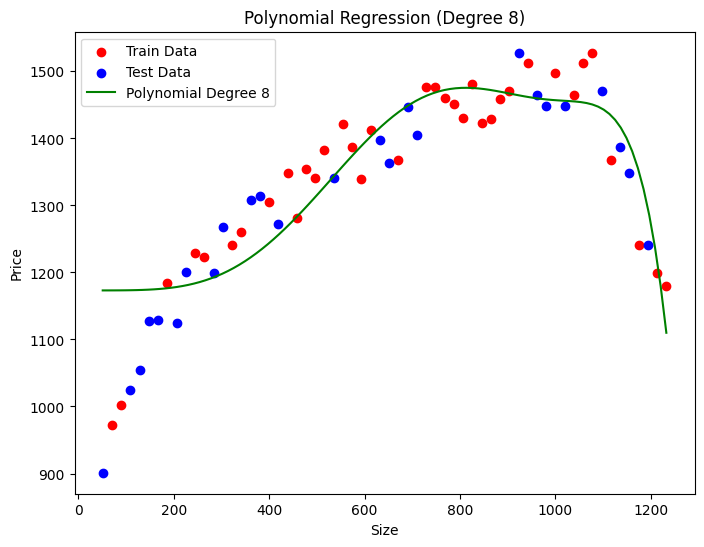

Polynomial Degree 8:
Coefficients: [ 0.00000000e+00  1.09813951e-16  5.98241062e-19  2.92153697e-16
  1.08153413e-13  2.50650400e-11 -6.64771135e-14  6.00793303e-17
 -1.83835659e-20]
Intercept: 1173.1765895555473
R^2 Score (Train): 0.7744
R^2 Score (Test): 0.7490


Best Model: Degree 4 with R^2 Test Score: 0.9651


In [55]:

# Definování vstupních proměnných (X) a cílové proměnné (Y)
X = data['Size'].values.reshape(-1, 1)  # Předpokládám, že sloupec s velikostí se jmenuje "Size"
Y = data['Price'].values  # Předpokládám, že sloupec s cenou se jmenuje "Price"

# Rozdělení dat na trénovací a testovací sady
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

# Funkce pro vizualizaci modelu
def visualize_model(predict_function, X_train, Y_train, X_test, Y_test, degree):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train, Y_train, color='red', label='Train Data')
    plt.scatter(X_test, Y_test, color='blue', label='Test Data')

    # Vykreslení predikční křivky
    curve_x = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    curve_y = predict_function(curve_x)
    plt.plot(curve_x, curve_y, label=f'Polynomial Degree {degree}', color='green')

    plt.title(f'Polynomial Regression (Degree {degree})')
    plt.xlabel('Size')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Inicializace úložiště pro modely a skóre
degrees = range(2, 9)
polynomial_models = {}
r2_scores = {}

# Trénování polynomiálních regresních modelů pro stupně 2 až 8
for degree in degrees:
    # Transformace vstupních proměnných pro polynomiální regresi
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Trénování lineárního modelu
    lr_poly = LinearRegression()
    lr_poly.fit(X_train_poly, Y_train)

    # Uložení modelu a výpočtu skóre
    polynomial_models[degree] = lr_poly

    # Predikce a výpočet R^2 skóre
    Y_train_pred = lr_poly.predict(X_train_poly)
    Y_test_pred = lr_poly.predict(X_test_poly)

    r2_train = r2_score(Y_train, Y_train_pred)
    r2_test = r2_score(Y_test, Y_test_pred)

    r2_scores[degree] = {'train': r2_train, 'test': r2_test}

    # Vytvoření predikční funkce
    predict_function = lambda x: lr_poly.predict(poly.transform(x))

    # Vizualizace modelu
    visualize_model(predict_function, X_train, Y_train, X_test, Y_test, degree)

    # Zobrazení parametrů a skóre modelu
    print(f"Polynomial Degree {degree}:")
    print(f"Coefficients: {lr_poly.coef_}")
    print(f"Intercept: {lr_poly.intercept_}")
    print(f"R^2 Score (Train): {r2_train:.4f}")
    print(f"R^2 Score (Test): {r2_test:.4f}\n")

# Výběr nejlepšího modelu na základě R^2 skóre na testovacích datech
best_degree = max(r2_scores.keys(), key=lambda d: r2_scores[d]['test'])
print(f"\nBest Model: Degree {best_degree} with R^2 Test Score: {r2_scores[best_degree]['test']:.4f}")
